Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example['image'], example['label']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.VA289G_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.VA289G_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [7]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 105ms/step - accuracy: 0.7944 - loss: 0.6402 - val_accuracy: 0.9802 - val_loss: 0.0624
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9685 - loss: 0.1048 - val_accuracy: 0.9876 - val_loss: 0.0393
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9781 - loss: 0.0698 - val_accuracy: 0.9880 - val_loss: 0.0351
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9817 - loss: 0.0612 - val_accuracy: 0.9895 - val_loss: 0.0318
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9849 - loss: 0.0498 - val_accuracy: 0.9914 - val_loss: 0.0247
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9871 - loss: 0.0439 - val_accuracy: 0.9907 - val_loss: 0.0269
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9917 - val_loss: 0.0276
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9901 - loss: 0

In [10]:
score = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {score[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9909 - loss: 0.0299
Test Accuracy: 99.27%


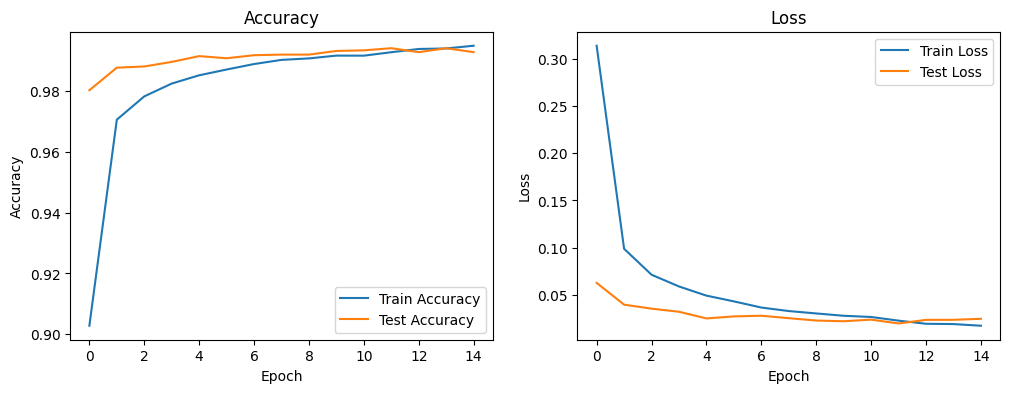

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Print training accuracy for all epochs
print("Train accuracy per epoch:", history.history['accuracy'])


Train accuracy per epoch: [0.902816653251648, 0.9705166816711426, 0.9781666398048401, 0.9823833107948303, 0.9850999712944031, 0.9869999885559082, 0.9887999892234802, 0.9901666641235352, 0.9906499981880188, 0.9915666580200195, 0.9915500283241272, 0.9926833510398865, 0.9937499761581421, 0.9939166903495789, 0.9948166608810425]


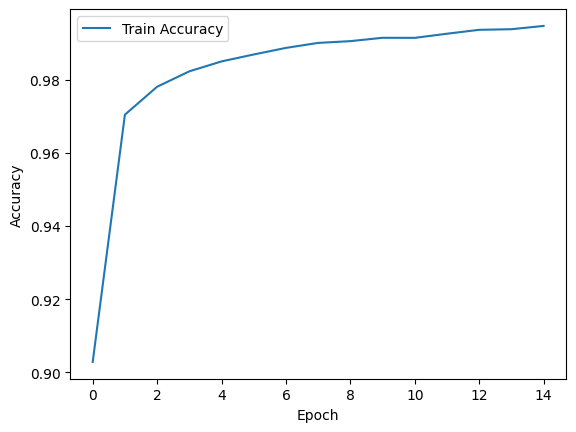

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


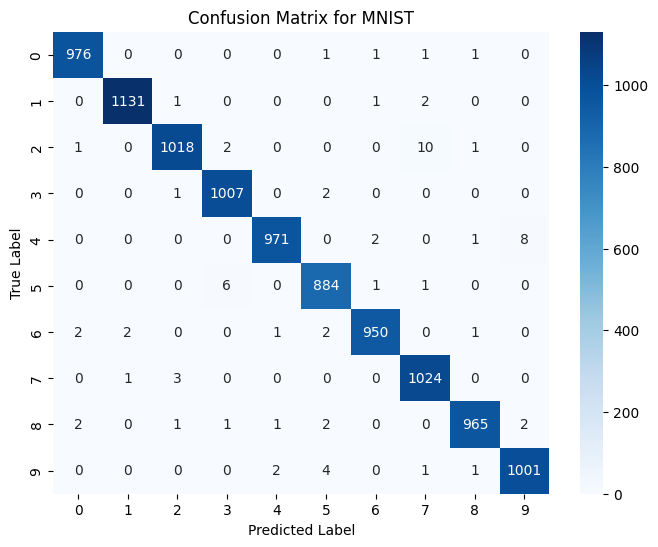

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST')
plt.show()


In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predict classes for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print detailed classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print(report)

# Print overall accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Overall Accuracy: {accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
              precision    recall  f1-score   support

           0     0.9949    0.9959    0.9954       980
           1     0.9974    0.9965    0.9969      1135
           2     0.9941    0.9864    0.9903      1032
           3     0.9911    0.9970    0.9941      1010
           4     0.9959    0.9888    0.9923       982
           5     0.9877    0.9910    0.9894       892
           6     0.9948    0.9916    0.9932       958
           7     0.9856    0.9961    0.9908      1028
           8     0.9948    0.9908    0.9928       974
           9     0.9901    0.9921    0.9911      1009

    accuracy                         0.9927     10000
   macro avg     0.9926    0.9926    0.9926     10000
weighted avg     0.9927    0.9927    0.9927     10000

Overall Accuracy: 99.27%


In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Redefine the model architecture before saving
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# ✅ Save in the new Keras format (recommended)
model.save("/content/final_model.keras")

# (You can still load and test it)
model = load_model("/content/final_model.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
